# Pioneer MAB Storm Example Activity / Python Quickstart
Written by Sage Lichtenwalner, Rutgers University, May 23, 2024

In this notebook, we will demonstrate how to access and plot data from the new *OOI Pioneer MAB Array*. 

<img src="https://oceanobservatories.org/wp-content/uploads/2021/06/Pioneer-Figure-1.png" width="450px">

The Pioneer MAB Array was deployed in April 2024 off the coast of North Carolina, a bit north of Cape Hatteras.  While there are a number of ways to access data from the OOI, we will use the relatively new OOI ERDDAP data server, which provides a straightforward way to request and download data.  Erddap servers are used by a number of oceanographic data centers, so once you learn one, you can easily get around others.  

This example will highlight wind, wave and weather measurements made by the *Central Surface Mooring* during the [first storm](https://ocracokeobserver.com/2024/04/09/another-brief-storm-system-heading-our-way-thursday/) to pass by the array in late April.  Weather timeseries measurements tend to be easier for students to work with, as they tend to be straightforward measurements and students often have an intuitive understanding of what they mean.

<img src="https://oceanobservatories.org/wp-content/uploads/2024/03/MAB-Array-map-2-scaled.jpg" width="450px" align="right">

**At the end of this notebook activity, you will be able to:**

* Understand how to use the *erddapy* library to easily load data from the OOI ERDDAP data server into a programming environment
* Generate graphs of wind, waves and other variables from the Pioneer MAB Central Surface Mooring
* Compare different techniques for plotting multiple variables/instruments on the same graph
* Use 2 ways to select time periods for graphing (during download vs. plot axes limits)
* Interpret the time relationship between multiple variables
* Understand how to use the erddapy search feature to find other OOI instruments (optional extension)

**Pedagogical Approach**
In addition to demonstrating how to use code to access and plot OOI data, this notebook will also (loosely) use the Engage-Explore-Make Meaning format to guide students through the activity.  You can find out more about this approach (which is a pared down version of the 5E constructivist model) on the [Polar ICE](https://polar-ice.org/about-us/polar-cap/) site.

## Engage - Finding a Wind Storm

In April 2024, a [coastal storm](https://ocracokeobserver.com/2024/04/09/another-brief-storm-system-heading-our-way-thursday/) passed the new Pioneer MAB Array off the coast of North Carolina. This was the first storm the new array measured. According to [timeanddate.com](https://www.timeanddate.com/weather/@4470221/historic?month=4&year=2024), the highest winds during the storm were recorded late in the day on April 11.  Let's take a look at what the Central Surface Mooring recorded this month, to see how the storm compares with the rest of the month.  

To start, we'll focus on wind.  Later on, we'll take a look at waves and turbidity to see how the storm impacted the waves and sediment in the ocean.

### Step 0 - Setup the notebook
In order to run code in this notebook, we will rely on several Python *libraries* that provide us with a number of functions to load, plot and deal with data.  To use these libraries, they must first be loaded into memory.

In [1]:
# Install erddapy
# !pip install erddapy

In [2]:
# Notebook Setup
from erddapy import ERDDAP
import pandas as pd
import matplotlib.pyplot as plt

### Step 1 - Load the Data with erddapy
We will use the [erddapy](https://ioos.github.io/erddapy/) library to load the dataset from the OOI Erddap server.  
* First we need to initialize the connection with the library.
* Then for each dataset we need, we will use the `e.get_download_url()` function to create the URL to download the data we want.
* Finally, we will load the data into a *Pandas DataFrame,* which is a popular library for playing with *spreadsheet* like data in python.

In [3]:
# Setup Erddap connection
server = "https://erddap.dataexplorer.oceanobservatories.org/erddap/"
e = ERDDAP(
    server=server,
    protocol="tabledap",
    response="csv",
)

In order to download data from Erddap, we need to know the *dataset ID*.  To find the ID, navigate to the instrument you want on the OOI Data Explorer, then click the green *Download* button, and select the *Erddap Metadata* option.  This will bring up a page with the Dataset ID at the top.  Here the the IDs we will need for Winds and Waves.

* Central Surface Mooring, Surface Buoy: Bulk Meteorology Instrument Package A, [Winds: Speed and Direction](https://dataexplorer.oceanobservatories.org/#metadata/110925/station/8/sensor/data?leg_clim_max=false&leg_clim_min=false)
  * ooi-cp10cnsm-sbd11-06-metbka000
* Central Surface Mooring, Surface Buoy: Surface Wave Spectra, [Waves: Significant Height and Direction](https://dataexplorer.oceanobservatories.org/#metadata/110932/station/232/sensor/data?leg_clim_max=false&leg_clim_min=false)
  * ooi-cp10cnsm-sbd12-05-wavssa000


In [4]:
# Construct the URL to access Wind Data
url_wind = e.get_download_url(
    dataset_id = "ooi-cp10cnsm-sbd11-06-metbka000",
    constraints = {
      "time>=": "2024-04-01",
      "time<=": "2024-04-30",
    }
)

# By default, Jupyter notebooks will print out the last line, if it's simply a variable
# Otherwise, you will need to use the print() function to display variables earlier in the cell
url_wind

'https://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-cp10cnsm-sbd11-06-metbka000.csv?&time>=1711929600.0&time<=1714435200.0'

If you click on this URL we created, it will download the CSV file to your computer.  But we don't need to do that, we can have the script download and load the data directly.  There are a number of ways to do this, but we will use the pandas `read_csv()` function.

Note, if we use the "csv" response option above in the erddapy setup, we need to skip the 2nd row in the data file that contains the units.  Alternatively, we could use the "csvp" option which would combine the units and variable name into the header row.

In [5]:
# Load the data from the url
df_wind = pd.read_csv(url_wind, index_col='time', parse_dates=True, skiprows=[1])

# Display the first few lines
df_wind.head()

,latitude,longitude,z,air_pressure,sea_water_electrical_conductivity,condsrf,frshflx,mommflx,latnflx,latnflx__minute,...,downwelling_longwave_flux_in_air,downwelling_shortwave_flux_in_air,sea_surface_salinity,air_temperature,sea_surface_temperature,tempskn,eastward_wind,northward_wind,wind_speed,station
time,,,,,,,,,,,,,,,,,,,,,
2024-04-04 00:00:00+00:00,35.94988,-75.11943,0.0,993.430,NaN,3.27450,NaN,NaN,NaN,NaN,...,372.100006,2.60,28.562679,14.866,11.2890,NaN,1.821629,8.318616,NaN,NaN
2024-04-04 00:01:00+00:00,35.94988,-75.11943,0.0,993.430,NaN,3.27760,NaN,NaN,NaN,NaN,...,371.399994,2.50,28.618954,14.828,11.2550,NaN,1.920159,8.838608,NaN,NaN
2024-04-04 00:02:00+00:00,35.94988,-75.11943,0.0,993.500,NaN,3.27380,NaN,NaN,NaN,NaN,...,371.700012,2.60,28.551282,14.813,11.2950,NaN,2.155071,8.988330,NaN,NaN
2024-04-04 00:03:00+00:00,35.94988,-75.11943,0.0,993.465,NaN,3.27745,NaN,NaN,NaN,NaN,...,372.250000,2.55,28.603192,14.862,11.2735,NaN,2.370044,8.909518,NaN,NaN
2024-04-04 00:04:00+00:00,35.94988,-75.11943,0.0,993.220,NaN,3.27550,NaN,NaN,NaN,NaN,...,372.600006,2.60,28.571562,14.858,11.2900,NaN,1.905212,9.264139,NaN,NaN


As you can see the METBK sensor has a lot of variables. We're only going to focus on wind_speed right now, but you can play with the others later if you're interested.

If you look at the first few rows for wind_speed, you'll noticed they are all NaN.  This is because this measurement is currently only calculated every hour, while the raw data is available every minute.  To deal with this, we could either calculate wind_speed for every minute based on the east and north wind velocities, or we can simply remove the rows that do not have a valid wind_speed to simplify the data. 

In [6]:
# Remove the NaN wind_speed values
df_wind = df_wind.dropna(subset='wind_speed')
df_wind.head()

,latitude,longitude,z,air_pressure,sea_water_electrical_conductivity,condsrf,frshflx,mommflx,latnflx,latnflx__minute,...,downwelling_longwave_flux_in_air,downwelling_shortwave_flux_in_air,sea_surface_salinity,air_temperature,sea_surface_temperature,tempskn,eastward_wind,northward_wind,wind_speed,station
time,,,,,,,,,,,,,,,,,,,,,
2024-04-04 05:27:00+00:00,35.94988,-75.11943,0.0,996.19,NaN,3.4054,-9.150000e-08,0.260062,15.701299,12.064283,...,361.547476,2.400000,30.273337,11.497008,10.746695,10.733044,3.802182,-10.085208,12.009406,NaN
2024-04-04 06:27:00+00:00,35.94988,-75.11943,0.0,NaN,NaN,NaN,-7.000000e-08,0.109626,27.934739,NaN,...,285.928061,1.712282,NaN,10.669146,10.705088,10.600101,NaN,NaN,8.664866,NaN
2024-04-04 07:27:00+00:00,35.94988,-75.11943,0.0,996.88,NaN,3.4772,-8.360000e-08,0.079619,30.599669,28.090997,...,279.281068,1.993516,31.028822,10.506804,10.692357,10.565952,3.588233,-5.914413,7.634116,NaN
2024-04-04 08:27:00+00:00,35.94988,-75.11943,0.0,997.15,NaN,3.4926,9.100000e-09,0.044095,22.486617,22.242116,...,279.238749,1.700000,31.243770,10.449143,10.602087,10.451609,1.690051,-5.309927,6.033903,NaN
2024-04-04 09:27:00+00:00,35.94988,-75.11943,0.0,997.71,NaN,3.4984,4.200000e-09,0.016292,10.477231,10.257714,...,289.046529,1.600000,31.396795,10.397347,10.507155,10.311763,2.087565,-3.045599,3.869668,NaN


### Step 2 - A Quick Plot of Winds

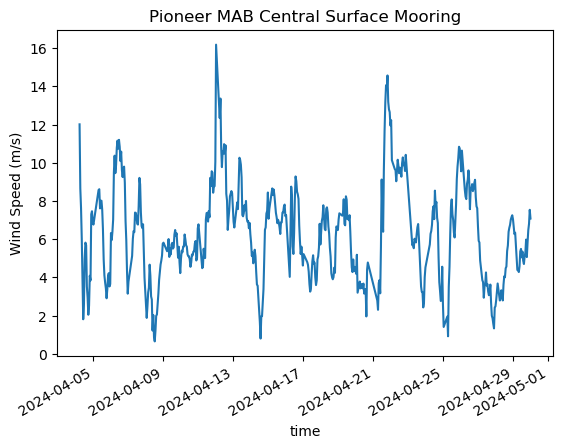

In [7]:
# Make a quick plot using the built-in Pandas plotting function
df_wind.wind_speed.plot()
plt.ylabel('Wind Speed (m/s)')
plt.title('Pioneer MAB Central Surface Mooring');

**Questions**

* What is the max and minimum wind speed?
* Describe the general pattern of the windspeed throughout the month.
* When was the highest wind speed measured?  Does that match the timeframe of the storm?

## Explore - Comparing Winds and Waves
Now that we've looked at the wind speed, let's load another dataset that includes waves so we can compare the two.

We'll use the same code as before, but save the dataset as a different variable.

In [8]:
# Load the Wave Data
url_wave = e.get_download_url(
    dataset_id = "ooi-cp10cnsm-sbd12-05-wavssa000",
    constraints = {
      "time>=": "2024-04-01",
      "time<=": "2024-04-30",
    }
)
print(url_wave)

df_waves = pd.read_csv(url_wave, index_col='time', parse_dates=True, skiprows=[1])
df_waves.head()

https://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-cp10cnsm-sbd12-05-wavssa000.csv?&time>=1711929600.0&time<=1714435200.0


,latitude,longitude,z,sea_surface_wave_mean_period,sea_surface_wave_mean_height,sea_surface_wave_to_direction,sea_surface_wave_maximum_height,sea_surface_wave_significant_height,sea_surface_wave_significant_period,station
time,,,,,,,,,,
2024-04-04 00:23:00+00:00,35.94988,-75.11943,0.0,5.5,1.43,155.545919,3.52,2.21,6.8,NaN
2024-04-04 01:23:00+00:00,35.94988,-75.11943,0.0,5.4,1.28,155.375921,3.17,1.98,6.6,NaN
2024-04-04 02:23:00+00:00,35.94988,-75.11943,0.0,5.5,1.18,156.595922,2.97,1.81,6.7,NaN
2024-04-04 03:23:00+00:00,35.94988,-75.11943,0.0,5.5,1.29,153.905920,3.76,2.03,6.7,NaN
2024-04-04 04:23:00+00:00,35.94988,-75.11943,0.0,5.7,1.31,154.705908,3.38,2.08,7.0,NaN


### Wind and Wave Plots
Let's walk through a few different ways you can make plots comparing two variables.
* First, we'll plot variables on the same graph
* Second, we'll use subplots to plot the two variables separately.
* Finally, we'll use a special function (twinx) to plot both variables on the same plot, but with different y-axes.

### Plot the data on the same graph 
This is not an ideal option in this case, becuase the units are different.  But if we were plotting two temperature lines, this would be a good approach.

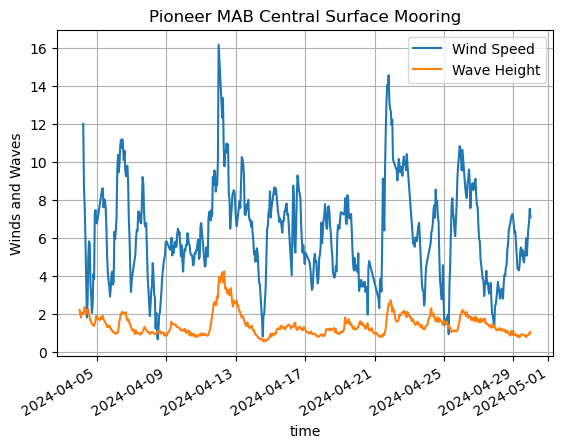

In [9]:
df_wind['wind_speed'].plot(label='Wind Speed')
df_waves['sea_surface_wave_significant_height'].plot(label='Wave Height')

plt.legend()
plt.ylabel('Winds and Waves')
plt.grid()
plt.title('Pioneer MAB Central Surface Mooring');

### Subplots

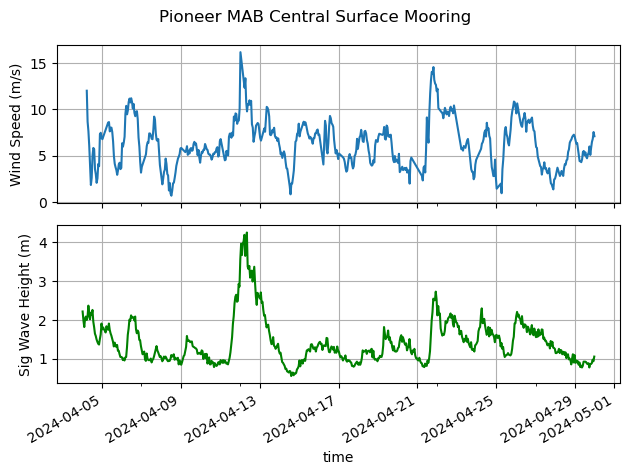

In [10]:
# Subplots using the built-in pandas plot function
fig,(ax1,ax2) = plt.subplots(2,1, sharex=True)

df_wind['wind_speed'].plot(ax=ax1)
ax1.set_ylabel('Wind Speed (m/s)')
ax1.grid()

df_waves['sea_surface_wave_significant_height'].plot(ax=ax2, color='green')
ax2.set_ylabel('Sig Wave Height (m)')
ax2.grid()

fig.suptitle('Pioneer MAB Central Surface Mooring')
fig.tight_layout()

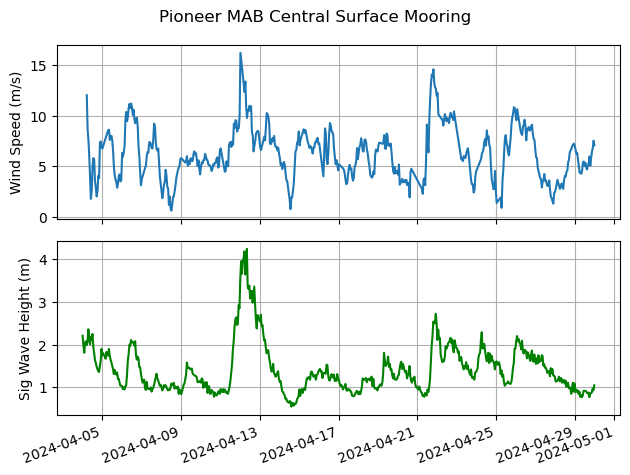

In [11]:
# Subplots using matplotlib plot(x,y) function
fig,(ax1,ax2) = plt.subplots(2,1, sharex=True)

ax1.plot(df_wind.index, df_wind['wind_speed'])
ax1.set_ylabel('Wind Speed (m/s)')
ax1.grid()

ax2.plot(df_waves.index, df_waves['sea_surface_wave_significant_height'], color='green')
ax2.set_ylabel('Sig Wave Height (m)')
ax2.grid()

# When we use matplotlib directly for plotting, we will typically need to rotate the x-tick labels
fig.autofmt_xdate(rotation=20)

fig.suptitle('Pioneer MAB Central Surface Mooring')
fig.tight_layout()

### TwinX Plot
Another approach is to plot both variables in the same plot using two different y-scales.  This is not typically recommended by data visualization experts, because of the complexity of interpreting two different scales on top of each other.  But you will see this style all the time in oceanography, and it can make correlations easier to interpret.

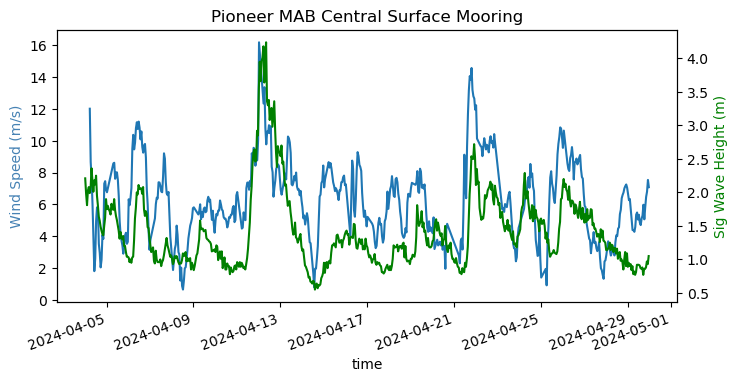

In [12]:
# TwinX Plot
fig = plt.figure(figsize=(8,4))

df_wind['wind_speed'].plot()
plt.ylabel('Wind Speed (m/s)', color='steelblue')

ax2 = plt.twinx()
df_waves['sea_surface_wave_significant_height'].plot(ax=ax2, color='green')
ax2.set_ylabel('Sig Wave Height (m)', color='green')

# We need to rotate the ticks
fig.autofmt_xdate(rotation=20)

plt.title('Pioneer MAB Central Surface Mooring');

### Zooming in on time
Finally, let's demonstrate how to zoom in on a particular time period.  

One option is to go back up to the top and select a different time range for our data request.  If we wanted to expand the time period, we would definitely have to do this.  However, if we want to zoom in, because we already have the data we want loaded, we can simply change the x-limits on the graph to the range we want.

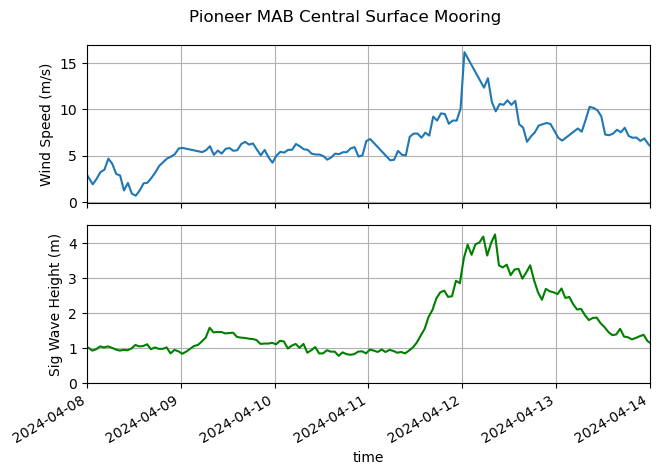

In [13]:
# Zoom into a specific time
from datetime import datetime

# Subplots using the built-in pandas plot function
fig,(ax1,ax2) = plt.subplots(2,1, sharex=True)

df_wind['wind_speed'].plot(ax=ax1)
ax1.set_ylabel('Wind Speed (m/s)')
ax1.grid()

df_waves['sea_surface_wave_significant_height'].plot(ax=ax2, color='green')
ax2.set_ylabel('Sig Wave Height (m)')
ax2.grid()

fig.suptitle('Pioneer MAB Central Surface Mooring')
fig.tight_layout()

# Because the x-axis is shared, we only have to do this once.
ax1.set_xlim(datetime(2024,4,8),datetime(2024,4,14));

# Let's also expand the y-limit so it starts at 0
ax2.set_ylim(0,4.5);

Now that we've demonstrated how to load and plot OOI data in python, let's reflect on the data we've plotted.

**Questions**

* What is the minimum and maximum of each dataset?
* What patterns do you see in the data?
  * How do the lines compare?
  * Are there periods when they move together?  Periods when they seem to move less in sync?
  * When are the peaks in the two datasets?  How do they compare?
* Why do you think these datasets are or are not correlated at different times?

## Make Meaning - Adding in Turbidity 

We can also lood other instruments, like turbidity which is a measure of how much sediment or other particles are in the water.

Let's load the [surface](https://dataexplorer.oceanobservatories.org/#metadata/110984/station/37/sensor/data?start=2024-04-01T00:00:00Z&end=2024-05-01T00:00:00Z&leg_clim_max=false&leg_clim_min=false) and [bottom](https://dataexplorer.oceanobservatories.org/#metadata/110983/station/37/sensor/data?start=2024-04-01T00:00:00Z&end=2024-05-01T00:00:00Z&leg_clim_max=false&leg_clim_min=false) turbidity instruments at the mooring and see how the storm affected them.

In [14]:
# Load Surface Turbidity
url_tsurf = e.get_download_url(
    dataset_id = "ooi-cp10cnsm-rid26-03-turbda000",
    constraints = {
      "time>=": "2024-04-01",
      "time<=": "2024-04-30",
    }
)
df_tsurf = pd.read_csv(url_tsurf, index_col='time', parse_dates=True, skiprows=[1])

# Load Bottom Turbidity
url_tbot = e.get_download_url(
    dataset_id = "ooi-cp10cnsm-mfd36-03-turbda000",
    constraints = {
      "time>=": "2024-04-01",
      "time<=": "2024-04-30",
    }
)
df_tbot = pd.read_csv(url_tbot, index_col='time', parse_dates=True, skiprows=[1])

And now let's make a plot!

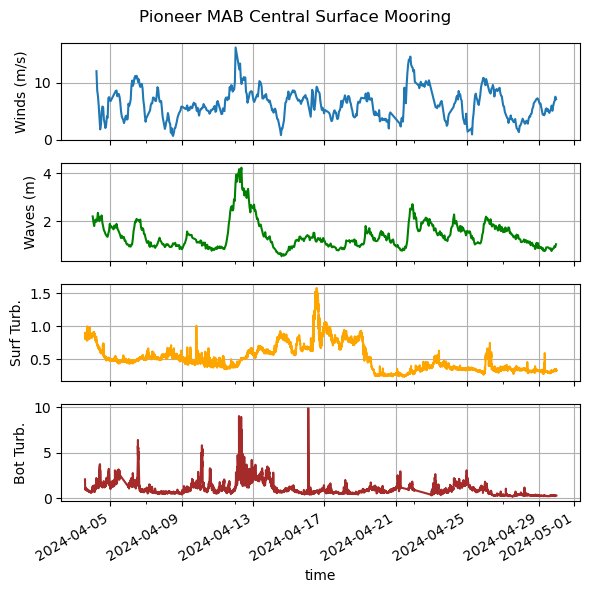

In [15]:
# Subplots using the built-in pandas plot function
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex=True, figsize=(6,6))

df_wind['wind_speed'].plot(ax=ax1)
ax1.set_ylabel('Winds (m/s)')
ax1.grid()

df_waves['sea_surface_wave_significant_height'].plot(ax=ax2, color='green')
ax2.set_ylabel('Waves (m)')
ax2.grid()

df_tsurf['sea_water_turbidity'].plot(ax=ax3, color='orange')
ax3.set_ylabel('Surf Turb.')
ax3.grid()

df_tbot['sea_water_turbidity'].plot(ax=ax4, color='brown')
ax4.set_ylabel('Bot Turb.')
ax4.grid()

fig.suptitle('Pioneer MAB Central Surface Mooring')
fig.tight_layout()

**Questions**

* What is the max and min values observed for the surface and bottom turbidity sensors?
* When do the surface and bottom turbidity sensors peak?
* How do those peaks compare with each other?  With the wind and wave peaks?
* Why do you think the surface turbidity value is different from the bottom?
* Why do you think the timing of the peak is different for the surface and the bottom?
* Do you think the storm resuspended sediment from the seafloor?
* Do you think the sediment made it to the surface? 

## Going Beyond - Other Instruments
In addition to winds and waves, we can look at how the storm impacted other measurements made by the buoy.  

In fact, we already have a lot of other measurements already loaded you can look at.

* df_wind includes the following variables:
  * air_pressure
  * relative_humidity
  * sea_surface_salinity
  * air_temperature
  * sea_surface_temperature
* df_waves also includes
  * sea_surface_wave_significant_period

In the cells below, use the code above to make some addtional plots.  You can try plotting some of the other variables, or you can change the date range of the plot.  (Note, if you want data after April, you will need to re-run the data load statements or copy and create new ones below.)

In [16]:
# Your turn - Make your own plots here




In [17]:
# Your turn - Make your own plots here


